Baisic Batting Analysis:

Overall Top RunScorer of WPL

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('../Cleaned_Dataset/cleaned_wpl_deliveries.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15375 entries, 0 to 15374
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          15375 non-null  int64 
 1   season            15375 non-null  int64 
 2   match_no          15375 non-null  int64 
 3   date              15375 non-null  object
 4   venue             15375 non-null  object
 5   batting_team      15375 non-null  object
 6   bowling_team      15375 non-null  object
 7   innings           15375 non-null  int64 
 8   over              15375 non-null  int64 
 9   striker           15375 non-null  object
 10  bowler            15375 non-null  object
 11  runs_of_bat       15375 non-null  int64 
 12  extras            15375 non-null  int64 
 13  wide              15375 non-null  int64 
 14  legbyes           15375 non-null  int64 
 15  byes              15375 non-null  int64 
 16  noballs           15375 non-null  int64 
 17  wicket_type 

In [27]:
top_run_scorers = df.groupby("striker")["runs_of_bat"].sum().reset_index()
top_run_scorers = top_run_scorers.sort_values(by="runs_of_bat", ascending=False)
top_run_scorers.head(10)

,striker,runs_of_bat
61,Nat Sciver-Brunt,1027
65,Perry,972
48,Lanning,952
86,Shafali Verma,865
42,Kaur,851
52,Matthews,758
50,Mandhana,648
75,Richa Ghosh,627
31,Grace Harris,581
28,Gardner,567


In [28]:
top_scorers_per_season = df.groupby(["season", "striker"])["runs_of_bat"].sum().reset_index()
top_scorers_per_season = top_scorers_per_season.sort_values(["season", "runs_of_bat"], ascending=[True, False])
top_scorers_per_season.groupby("season").head(10)


,season,striker,runs_of_bat
32,2023,Lanning,345
41,2023,Nat Sciver-Brunt,332
36,2023,McGrath,302
27,2023,Kaur,281
35,2023,Matthews,271
10,2023,Devine,266
20,2023,Healy,253
43,2023,Perry,253
54,2023,Shafali Verma,252
18,2023,Grace Harris,230


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_14700\3945776136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_run_scorers.values, y=top_run_scorers.index, palette="Blues_r")


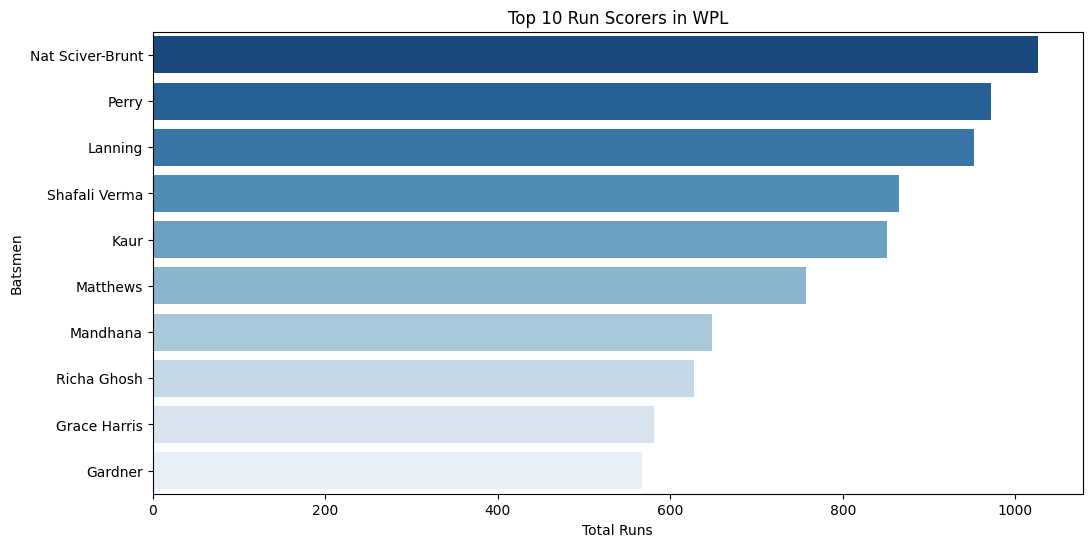

In [29]:
plt.figure(figsize=(12,6))
top_run_scorers = df.groupby("striker")["runs_of_bat"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_run_scorers.values, y=top_run_scorers.index, palette="Blues_r")
plt.xlabel("Total Runs")
plt.ylabel("Batsmen")
plt.title("Top 10 Run Scorers in WPL")
plt.show()


Best Strike Rate:

In [30]:
batting_stats = df.groupby("striker").agg(
    total_runs=("runs_of_bat", "sum"),
    total_balls=("match_id", "count"),  
    wides=("wide", "sum")
).reset_index()

batting_stats["balls_faced"] = batting_stats["total_balls"] - batting_stats["wides"]
batting_stats["strike_rate"] = (batting_stats["total_runs"] / batting_stats["balls_faced"]) * 100
batting_stats = batting_stats[batting_stats["balls_faced"] >= 100]
best_strike_rates = batting_stats.sort_values(by="strike_rate", ascending=False)
best_strike_rates.head(10)


,striker,total_runs,total_balls,wides,balls_faced,strike_rate
86,Shafali Verma,865,559,27,532,162.593985
19,Devine,402,266,4,262,153.435115
75,Richa Ghosh,627,425,8,417,150.359712
42,Kaur,851,614,21,593,143.507589
61,Nat Sciver-Brunt,1027,731,7,724,141.850829
28,Gardner,567,409,9,400,141.750000
44,Kiran Navgire,419,315,16,299,140.133779
31,Grace Harris,581,430,15,415,140.000000
76,Rodrigues,506,375,12,363,139.393939
38,Jonassen,295,217,4,213,138.497653


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_14700\1017286755.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_strike_rates["strike_rate"], y=top_strike_rates["striker"], palette="Greens_r")


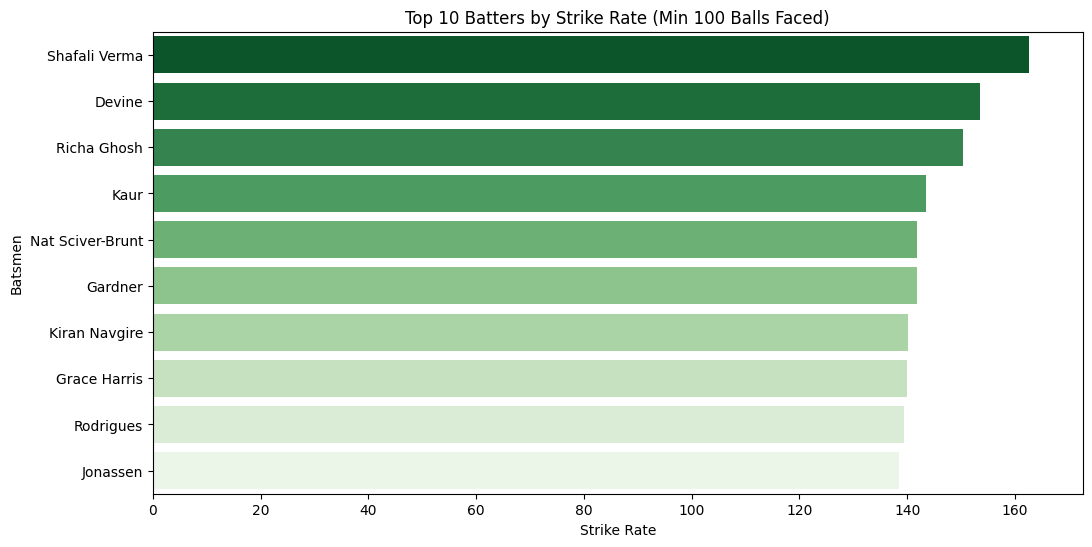

In [ ]:
plt.figure(figsize=(12,6))
top_strike_rates = best_strike_rates.head(10)
sns.barplot(x=top_strike_rates["strike_rate"], y=top_strike_rates["striker"], palette="Greens_r")

plt.xlabel("Strike Rate")
plt.ylabel("Batsmen")
plt.title("Top 10 Batters by Strike Rate (Min 100 Balls Faced)")
plt.xlim(0, max(top_strike_rates["strike_rate"]) + 10) 

plt.show()


Most 4s and Most 6s

In [31]:
top_six_hitters = df[df["runs_of_bat"] == 6]["striker"].value_counts().head(10)
top_four_hitters = df[df["runs_of_bat"] == 4]["striker"].value_counts().head(10)

print("🏏 Top 10 Six Hitters:\n", top_six_hitters)
print("\n🏏 Top 10 Four Hitters:\n", top_four_hitters)

🏏 Top 10 Six Hitters:
 striker
Shafali Verma    49
Richa Ghosh      30
Gardner          26
Perry            25
Kiran Navgire    24
Matthews         23
Kaur             22
Mandhana         20
Grace Harris     20
Devine           20
Name: count, dtype: int64

🏏 Top 10 Four Hitters:
 striker
Nat Sciver-Brunt    157
Lanning             142
Kaur                112
Perry               109
Matthews            104
Shafali Verma        93
Mandhana             88
Yastika              78
Mooney               75
Grace Harris         74
Name: count, dtype: int64


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_14700\1251454928.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sixes.values, y=sixes.index, ax=ax[0], palette="Oranges_r")
C:\Users\SACHIN\AppData\Local\Temp\ipykernel_14700\1251454928.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fours.values, y=fours.index, ax=ax[1], palette="Greens_r")


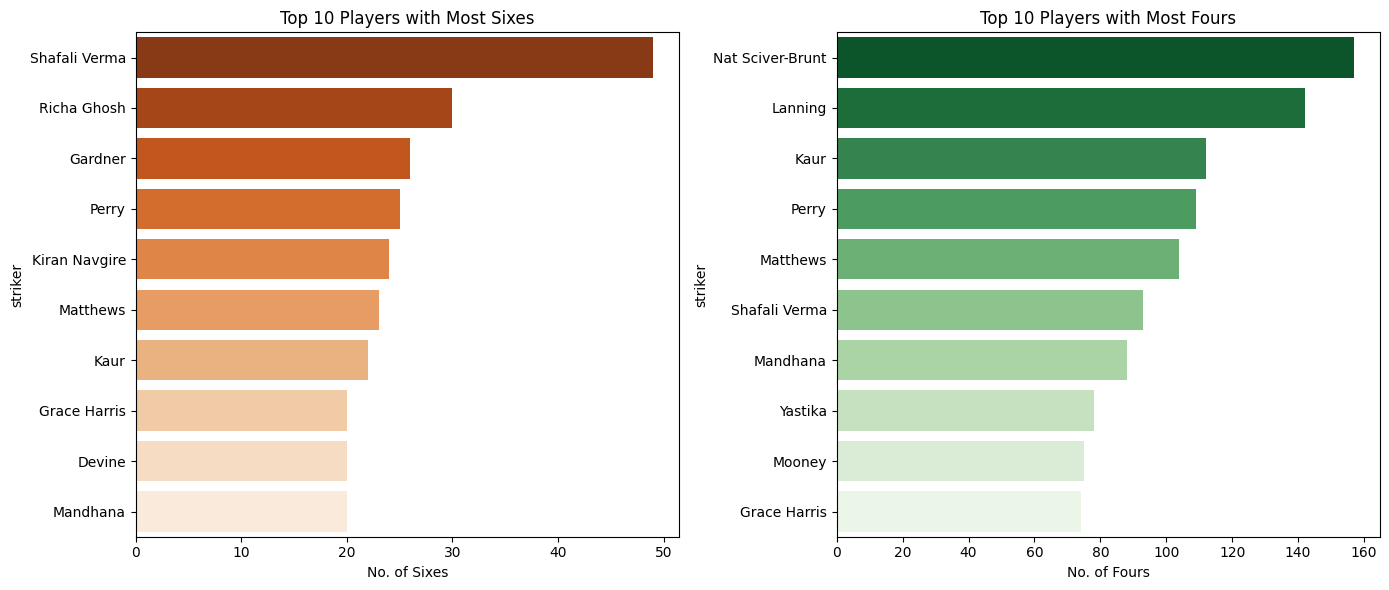

In [38]:
sixes = df[df["runs_of_bat"] == 6].groupby("striker")["runs_of_bat"].count().sort_values(ascending=False).head(10)
fours = df[df["runs_of_bat"] == 4].groupby("striker")["runs_of_bat"].count().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(x=sixes.values, y=sixes.index, ax=ax[0], palette="Oranges_r")
ax[0].set_title("Top 10 Players with Most Sixes")
ax[0].set_xlabel("No. of Sixes")

sns.barplot(x=fours.values, y=fours.index, ax=ax[1], palette="Greens_r")
ax[1].set_title("Top 10 Players with Most Fours")
ax[1].set_xlabel("No. of Fours")

plt.tight_layout()
plt.show()


Powerplay vs Death Over Performances:

In [32]:
powerplay = df[(df["over"]>=1) & (df["over"]<=6)]
death_overs = df[(df["over"] >= 16) & (df["over"] <= 20)]

powerplay_runs = powerplay.groupby("batting_team")["runs_of_bat"].sum()
death_overs_runs = death_overs.groupby("batting_team")["runs_of_bat"].sum()

powerplay_balls = powerplay.groupby("batting_team").size()
death_overs_balls = death_overs.groupby("batting_team").size()

powerplay_strike_rate = (powerplay_runs / powerplay_balls) * 100
death_overs_strike_rate = (death_overs_runs / death_overs_balls) * 100

batting_phase_comparison = pd.DataFrame({
    "Powerplay Runs": powerplay_runs,
    "Powerplay Strike Rate": powerplay_strike_rate,
    "Death Overs Runs": death_overs_runs,
    "Death Overs Strike Rate": death_overs_strike_rate
})
print(batting_phase_comparison)


              Powerplay Runs  Powerplay Strike Rate  Death Overs Runs  \
batting_team                                                            
DCW                     1318             130.108588               675   
GG                       986             106.135630               771   
MIW                     1199             111.431227               807   
RCBW                    1132             118.534031               810   
UPW                     1045             111.764706               736   

              Death Overs Strike Rate  
batting_team                           
DCW                        155.172414  
GG                         140.437158  
MIW                        157.617188  
RCBW                       159.763314  
UPW                        142.912621  


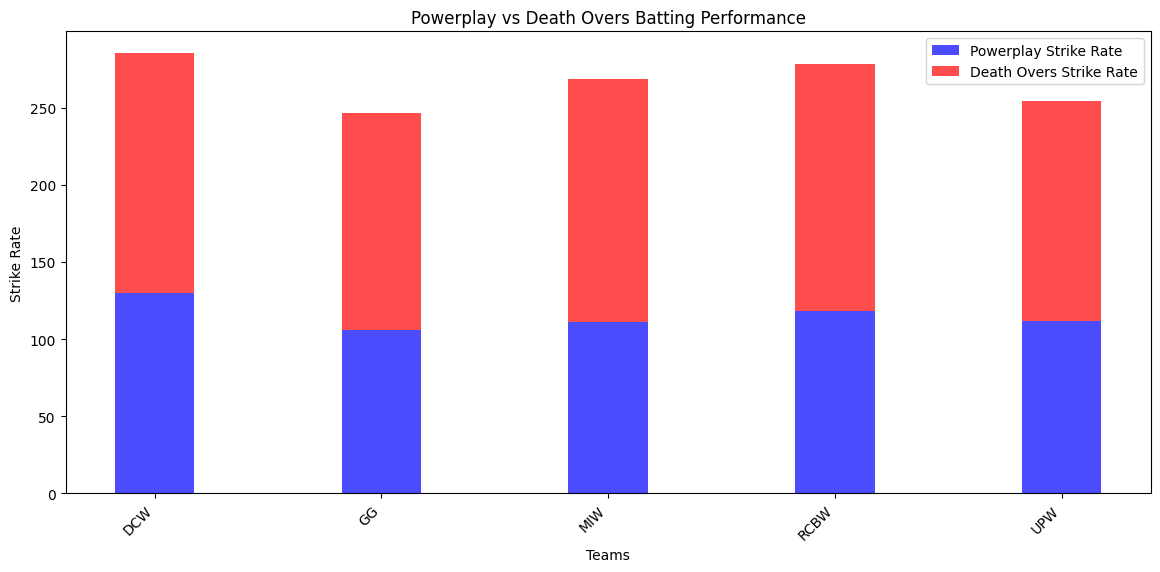

In [ ]:
plt.figure(figsize=(14,6))


bar_width = 0.35  
teams = batting_phase_comparison.index  

plt.bar(teams, batting_phase_comparison["Powerplay Strike Rate"], width=bar_width, label="Powerplay Strike Rate", color="blue", alpha=0.7)
plt.bar(teams, batting_phase_comparison["Death Overs Strike Rate"], width=bar_width, label="Death Overs Strike Rate", color="red", alpha=0.7, bottom=batting_phase_comparison["Powerplay Strike Rate"])

plt.xlabel("Teams")
plt.ylabel("Strike Rate")
plt.title("Powerplay vs Death Overs Batting Performance")
plt.xticks(rotation=45, ha="right") 
plt.legend()

plt.show()


In [ ]:
team_name_mapping = {
    "GGTW": "GG", 

}

df["batting_team"] = df["batting_team"].replace(team_name_mapping)
df["bowling_team"] = df["bowling_team"].replace(team_name_mapping)

print(df["batting_team"].unique())
print(df["bowling_team"].unique())


['UPW' 'MIW' 'RCBW' 'DCW' 'GG']
['MIW' 'UPW' 'DCW' 'RCBW' 'GG']


In [34]:
df.to_csv("../Cleaned_Dataset/cleaned_wpl_deliveries.csv", index=False)


In [35]:
powerplay = df[(df["over"]>=1) & (df["over"]<=6)]
death_overs = df[(df["over"] >= 16) & (df["over"] <= 20)]

powerplay_runs = powerplay.groupby("batting_team")["runs_of_bat"].sum()
death_overs_runs = death_overs.groupby("batting_team")["runs_of_bat"].sum()

powerplay_balls = powerplay.groupby("batting_team").size()
death_overs_balls = death_overs.groupby("batting_team").size()

powerplay_strike_rate = (powerplay_runs / powerplay_balls) * 100
death_overs_strike_rate = (death_overs_runs / death_overs_balls) * 100

batting_phase_comparison = pd.DataFrame({
    "Powerplay Runs": powerplay_runs,
    "Powerplay Strike Rate": powerplay_strike_rate,
    "Death Overs Runs": death_overs_runs,
    "Death Overs Strike Rate": death_overs_strike_rate
})
print(batting_phase_comparison)


              Powerplay Runs  Powerplay Strike Rate  Death Overs Runs  \
batting_team                                                            
DCW                     1318             130.108588               675   
GG                       986             106.135630               771   
MIW                     1199             111.431227               807   
RCBW                    1132             118.534031               810   
UPW                     1045             111.764706               736   

              Death Overs Strike Rate  
batting_team                           
DCW                        155.172414  
GG                         140.437158  
MIW                        157.617188  
RCBW                       159.763314  
UPW                        142.912621  


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns